<a href="https://colab.research.google.com/github/sabarishkannaramesh/dlt/blob/main/dltexp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.3732 - loss: 1.8359 - val_accuracy: 0.4612 - val_loss: 1.6426
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.3861 - loss: 1.7318 - val_accuracy: 0.4612 - val_loss: 1.5920
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.3991 - loss: 1.7660 - val_accuracy: 0.4612 - val_loss: 1.6084
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4093 - loss: 1.7072 - val_accuracy: 0.4612 - val_loss: 1.5982
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.3785 - loss: 1.7469 - val_accuracy: 0.4612 - val_loss: 1.5932
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.3974 - loss: 1.7357 - val_accuracy: 0.4612 - val_loss: 1.6051
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4102 - loss: 1.7067 - val_accuracy: 0.4612 - val_loss: 1.6291
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4156 - loss: 1.7093 - val_accuracy: 0.4612 - v

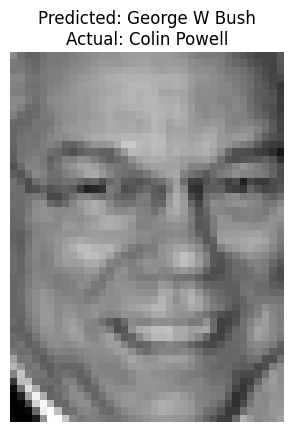

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
lfw_data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_data.images
y = lfw_data.target
target_names = lfw_data.target_names
n_classes = len(target_names)

X = X.reshape(-1, X.shape[1], X.shape[2], 1) / 255.0
y = to_categorical(y, n_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
 Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
 MaxPooling2D(2, 2),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D(2, 2),
 Flatten(),
 Dense(128, activation='relu'),
 Dropout(0.5),
 Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

def predict_and_display(index):
 sample = X_test[index].reshape(1, X.shape[1], X.shape[2], 1)
 prediction = model.predict(sample)
 predicted_label = target_names[np.argmax(prediction)]
 actual_label = target_names[np.argmax(y_test[index])]
 plt.imshow(X_test[index].reshape(X.shape[1], X.shape[2]), cmap='gray')
 plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
 plt.axis('off')
 plt.show()

predict_and_display(7)

model.save("lfw_face_recognition_cnn.h5")